In [1]:
%matplotlib inline

In [1]:
import os,re
import time,pickle
from tqdm import *
from os.path import expanduser
import numpy as np
import sklearn
import matplotlib.pylab as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
home = expanduser('~')
os.chdir(os.path.join(home,'Documents','project','agu_data','repo','agu_data'))
from Data_Utils import *

from gensim import corpora, models, similarities
from pprint import pprint
model_saved = os.path.join(home,'Documents','project','agu_data','repo','Notebook','Models')

In [2]:
data = get_all_data('agu2015')
sources = [df for df in data if (''.join(df.title) != "") and (df.abstract != '')]
abstracts = get_clean_abstracts(sources)
titles = get_clean_titles(sources)

In [9]:
texts = abstracts[:50]

In [191]:
import nltk
# Load SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

def tokenize_and_stem(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    bad_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('(^[a-z]+$|^[a-z][\d]$|^[a-z]\d[a-z]$|^[a-z]{3}[a-z]*-[a-z]*$)', token):
            filtered_tokens.append(token)
        else:
            bad_tokens.append(token)
    filtered_tokens = [token for token in filtered_tokens if token not in stopwords]
    stems = map(stemmer.stem,filtered_tokens)
    return map(str,stems)

In [194]:
from gensim import corpora, models, similarities
dictionary = corpora.Dictionary.load('/tmp/deerwester.dict')

IOError: [Errno 2] No such file or directory: '/tmp/deerwester.dict'

In [22]:
\w+[^~/]\w+

In [185]:
if re.search('^[a-z]{3}[a-z]*-', "dfd400ppm"):
    print 'heelo'

In [15]:
from pprint import pprint

In [192]:
texts = abstracts[:200]
pprint(set(reduce(lambda x,y:x+y,map(tokenize_and_stem,texts))))

set(['abat',
     'abid',
     'abil',
     'abiot',
     'abl',
     'aboard',
     'abod',
     'above-ment',
     'aboveground',
     'abrad',
     'abrupt',
     'absenc',
     'absent',
     'absolut',
     'absorpt',
     'abund',
     'abyss',
     'academ',
     'academia',
     'acceler',
     'acceleromet',
     'accept',
     'access',
     'acclim',
     'accommod',
     'accompani',
     'accord',
     'accordion',
     'account',
     'accret',
     'accretionari',
     'accumul',
     'accur',
     'accuraci',
     'acetaldehyd',
     'achiev',
     'acid',
     'acid-sulf',
     'acm',
     'acoust',
     'acquir',
     'acquisit',
     'acridicon-chuva',
     'across',
     'act',
     'action',
     'activ',
     'actor',
     'actual',
     'ad',
     'adakit',
     'adapt',
     'add',
     'addit',
     'address',
     'adequ',
     'adequaci',
     'adiabat',
     'adjac',
     'adjust',
     'administr',
     'adopt',
     'adsorpt',
     'advanc',
     'advanced

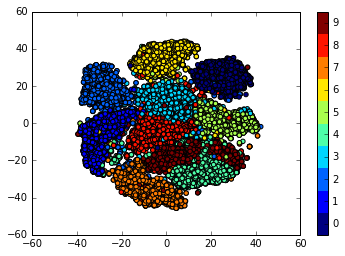

In [3]:
import numpy as np
from skdata.mnist.views import OfficialImageClassification
from matplotlib import pyplot as plt
from tsne import bh_sne

# load up data
data = OfficialImageClassification(x_dtype="float32")
x_data = data.all_images
y_data = data.all_labels

# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(x_data).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))

# For speed of computation, only run on a subset
n = 20000
x_data = x_data[:n]
y_data = y_data[:n]

# perform t-SNE embedding
vis_data = bh_sne(x_data)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

plt.scatter(vis_x, vis_y, c=y_data, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [254]:
>>> from gensim import corpora, models, similarities
>>>
>>> documents = ["Human machine interface for lab abc computer applications",
>>>              "A survey of user opinion of computer system response time",
>>>              "The EPS user interface management system",
>>>              "System and human system engineering testing of EPS",
>>>              "Relation of user perceived response time to error measurement",
>>>              "The generation of random binary unordered trees",
>>>              "The intersection graph of paths in trees",
>>>              "Graph minors IV Widths of trees and well quasi ordering",
>>>              "Graph minors A survey"]

In [280]:
# Load SnowballStemmer as variabled 'stemmer'
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

def tokenize_and_stem(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    bad_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('(^[a-z]+$|^[a-z][\d]$|^[a-z]\d[a-z]$|^[a-z]{3}[a-z]*-[a-z]*$)', token):
            filtered_tokens.append(token)
        else:
            bad_tokens.append(token)
    filtered_tokens = [token for token in filtered_tokens if token not in stopwords]
    stems = map(stemmer.stem,filtered_tokens)
    return map(str,stems)

In [281]:
txtfile = os.path.join(os.getcwd(),'mycorpus')
with open(txtfile+'.txt','w+') as f:
    for elt in documents:
        f.write(elt+'\n')

In [282]:
dictionary = corpora.Dictionary(tokenize_and_stem(line) for line in open(txtfile+'.txt')) 
dictionary.save(txtfile+'.dict')

In [283]:
>>> class MyCorpus(object):
>>>     def __iter__(self):
>>>         for line in open(txtfile+'.txt'):
>>>             # assume there's one document per line, tokens separated by whitespace
>>>             yield dictionary.doc2bow(tokenize_and_stem(line))

In [290]:
corpus = MyCorpus()
corpora.MmCorpus.serialize(txtfile+'.mm',corpus)

In [291]:
# Method 1
import gensim
corpus = corpora.MmCorpus(txtfile+'.mm')
dictionary = corpora.Dictionary.load(txtfile+'.dict')
numpy_matrix = gensim.matutils.corpus2dense(corpus, num_terms=len(dictionary))
normalized_matrix = numpy_matrix/np.sqrt(np.sum(numpy_matrix*numpy_matrix,axis=0))
score = np.dot(normalized_matrix.T,normalized_matrix[:,0])

In [292]:
index_bow = similarities.SparseMatrixSimilarity(corpus,num_features=len(dictionary))
score2 = index_bow[dictionary.doc2bow(tokenize_and_stem(documents[0]))]

In [293]:
np.allclose(score,score2)

True

In [ ]:
index_bow[dictionary.doc2bow()]

In [201]:
bow_corpus = MyCorpus

[[(0, 1), (1, 1), (2, 1)],
 [(1, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (6, 2), (8, 1)],
 [(3, 1), (4, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(5, 1), (10, 1), (11, 1)]]